# Exercício 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Carregando dados

In [2]:
df = pd.read_csv("9Gauss.csv", sep=';', names=['x','y','golden_truth'], header=None)

In [3]:
X = np.array(df.iloc[:,[0,1]])

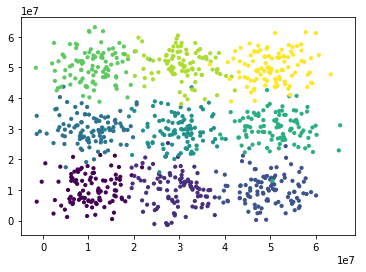

In [4]:
plt.scatter(X[:,0],X[:,1], s=10, c = df.golden_truth)
plt.show()

# Uma inicialização do k-Means

In [5]:
def distancia_euclidiana(x,y): # ao quadrado
    return ((x[0]-y[0])**2+(x[1]-y[1])**2)

In [6]:
centroides = np.column_stack([np.random.uniform(min(X[:,0]),max(X[:,0]), size=9),
                              np.random.uniform(min(X[:,1]),max(X[:,1]), size=9)])

In [7]:
J = np.infty
for i in range(100):

    distancias_aos_centroides = {}
    for j, x in enumerate(X):
        distancias_aos_centroides[j] = []
        for centr in centroides:
            distancias_aos_centroides[j].append(distancia_euclidiana(x,centr))

    matriz = pd.DataFrame(distancias_aos_centroides).T
    matriz['mais_prox'] = matriz.apply(np.argmin,axis=1)
    matriz = matriz.reset_index()

    J_new = sum([matriz.query("mais_prox == @grupo")[grupo].sum() 
                 for grupo in range(len(centroides))])

    if J_new >= J: # neste caso não atualizou
        J = J_new
        break
    else:
        J = J_new
        centroides = np.array([
            np.mean(X[matriz.query("mais_prox == @grupo").index], axis=0) 
            for grupo in range(len(centroides))])


In [8]:
print(J)
print(i)

4.020265467671727e+16
22


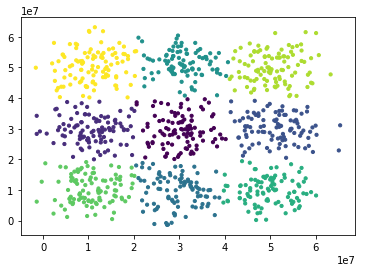

In [9]:
plt.scatter(X[:,0],X[:,1], s=10,  c = matriz['mais_prox'])
plt.show()

# Várias inicializações

In [10]:
lista_J = []
for t in tqdm(range(100)):
    
    centroides = np.column_stack([np.random.uniform(min(X[:,0]),max(X[:,0]), size=9),
                                  np.random.uniform(min(X[:,1]),max(X[:,1]), size=9)])
    J = np.infty
    for i in range(100):

        distancias_aos_centroides = {}
        for j, x in enumerate(X):
            distancias_aos_centroides[j] = []
            for centr in centroides:
                distancias_aos_centroides[j].append(distancia_euclidiana(x,centr))

        matriz = pd.DataFrame(distancias_aos_centroides).T
        matriz['mais_prox'] = matriz.apply(np.argmin,axis=1)
        matriz = matriz.reset_index()

        J_new = sum([matriz.query("mais_prox == @grupo")[grupo].sum() 
                     for grupo in range(len(centroides))])

        if J_new >= J: # neste caso não atualizou
            J = J_new
            break
        else:
            J = J_new
            centroides = np.array([
                np.mean(X[matriz.query("mais_prox == @grupo").index], axis=0) 
                for grupo in range(len(centroides))])
    
    lista_J.append(J)
    if J == min(lista_J):
        best = matriz['mais_prox']

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [05:44<03:55,  6.92s/it]C:\Users\carlo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\carlo\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:36<00:00,  6.22s/it]


In [11]:
min(lista_J)

4.019175177941683e+16

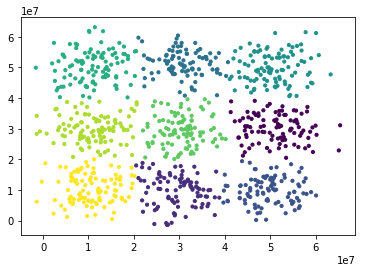

In [12]:
plt.scatter(X[:,0],X[:,1], s=10,  c = best)
plt.show()

# Dados uniformemente gerados

In [13]:
X_uni = np.column_stack([np.random.uniform(min(X[:,0]),max(X[:,0]), size=900),
                                  np.random.uniform(min(X[:,1]),max(X[:,1]), size=900)])

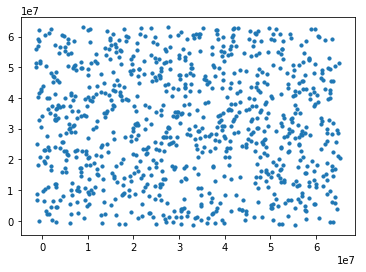

In [14]:
plt.scatter(X_uni[:,0],X_uni[:,1],s=10)
plt.show()

In [15]:
lista_J_uni = []
for t in tqdm(range(100)):
    
    centroides = np.column_stack([np.random.uniform(min(X[:,0]),max(X[:,0]), size=9),
                                  np.random.uniform(min(X[:,1]),max(X[:,1]), size=9)])
    J = np.infty
    for i in range(100):

        distancias_aos_centroides = {}
        for j, x in enumerate(X_uni):
            distancias_aos_centroides[j] = []
            for centr in centroides:
                distancias_aos_centroides[j].append(distancia_euclidiana(x,centr))

        matriz = pd.DataFrame(distancias_aos_centroides).T
        matriz['mais_prox'] = matriz.apply(np.argmin,axis=1)
        matriz = matriz.reset_index()

        J_new = sum([matriz.query("mais_prox == @grupo")[grupo].sum() 
                     for grupo in range(len(centroides))])

        if J_new >= J: # neste caso não atualizou
            J = J_new
            break
        else:
            J = J_new
            centroides = np.array([
                np.mean(X_uni[matriz.query("mais_prox == @grupo").index], axis=0) 
                for grupo in range(len(centroides))])
    
    lista_J_uni.append(J)
    if J == min(lista_J_uni):
        best = matriz['mais_prox']

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:56<00:00, 12.87s/it]


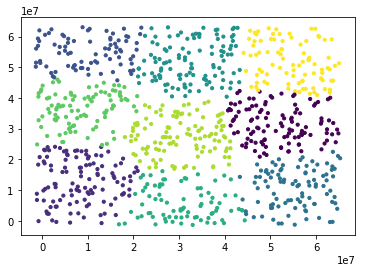

In [16]:
plt.scatter(X_uni[:,0],X_uni[:,1],s=10, c=best)
plt.show()

In [17]:
min(lista_J_uni)

6.839661073509089e+16

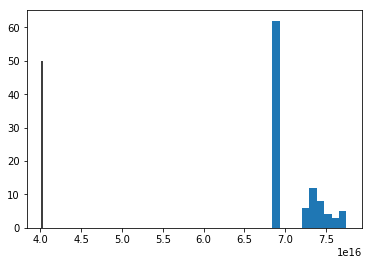

In [18]:
plt.vlines(min(lista_J),0,50)
plt.hist(lista_J_uni)
plt.show()

In [19]:
sum(lista_J_uni > min(lista_J))

100

Ficamos confiante que os cluster encontrados na 9Gauss fazem sentido e não são apenas encontrados ao acaso.